The dataset for this project is from the St. Louis Federal Reserve. The unemployment rate for African Americans from
1972 - present is included. The challenge for this project is to create the best time series model (out of five) and justify the choice.

Dataset information: 

Direct Data Source Link: https://fred.stlouisfed.org/series/LNS14000006

FRED Graph Observations	
Federal Reserve Economic Data	
Link: https://fred.stlouisfed.org	
Help: https://fredhelp.stlouisfed.org	
Economic Research Division	
Federal Reserve Bank of St. Louis	

	
LNS14000006	Unemployment Rate - Black or African American, Percent, Monthly, Seasonally Adjusted
	
Frequency: Monthly

In [1]:
# Import Packages 

import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Path to data source
path = "C:/Portfolio/Data Engineer Track/Thinkful/Time Series Challenge/afam_unemployment.xls"

In [3]:
# Set up data frame variable

df = pd.read_excel(path)

In [4]:
# First five columns

df.head()

,observation_date,unemployment_rate
0,1972-01-01,11.2
1,1972-02-01,11.2
2,1972-03-01,10.7
3,1972-04-01,9.8
4,1972-05-01,10.2


In [5]:
# Last five columns

df.tail()

,observation_date,unemployment_rate
610,2022-11-01,5.7
611,2022-12-01,5.7
612,2023-01-01,5.4
613,2023-02-01,5.7
614,2023-03-01,5.0


In [6]:
# Data frame structure

df.info

<bound method DataFrame.info of     observation_date  unemployment_rate
0         1972-01-01               11.2
1         1972-02-01               11.2
2         1972-03-01               10.7
3         1972-04-01                9.8
4         1972-05-01               10.2
..               ...                ...
610       2022-11-01                5.7
611       2022-12-01                5.7
612       2023-01-01                5.4
613       2023-02-01                5.7
614       2023-03-01                5.0

[615 rows x 2 columns]>

In [7]:
# Number of columns and rows

df.shape

(615, 2)

In [8]:
# Unemployment rate summary statistics

df.describe()

,unemployment_rate
count,615.000000
mean,11.589268
std,3.195311
min,5.000000
25%,9.350000
50%,11.200000
75%,14.000000
max,21.200000


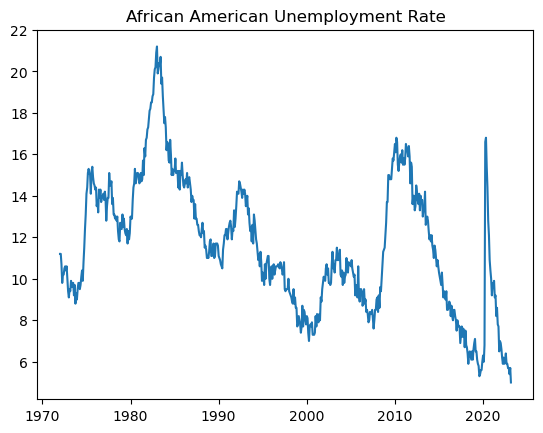

In [9]:
# Plotting African American Unemployment Rate

x = df["observation_date"]
y = df["unemployment_rate"]
plt.plot(x, y)
plt.title("African American Unemployment Rate")
plt.show()

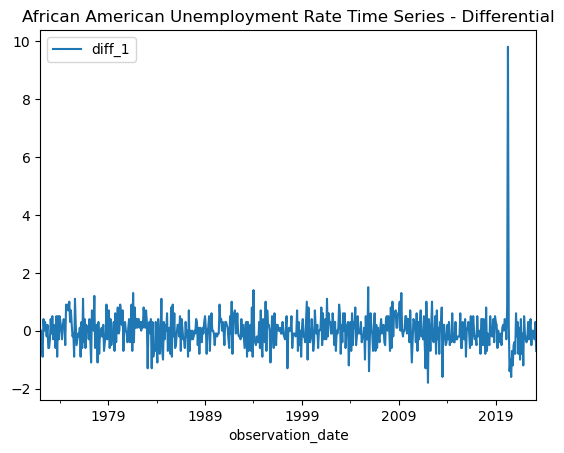

In [31]:
# 
df["diff_1"] = df.unemployment_rate - df.unemployment_rate.shift()
df.plot(y = "diff_1")
plt.title("African American Unemployment Rate Time Series - Differential")
plt.show()

Text(0.5, 1.0, 'Unemployment Rate PACF')

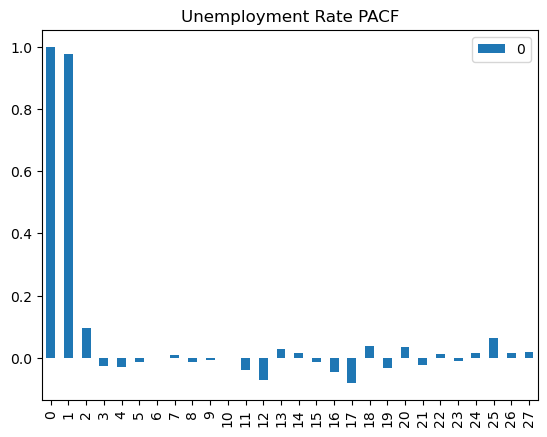

In [11]:
# Look at the PACF for the initial and differenced time series

from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(df.unemployment_rate))
x_acf.plot(kind = "bar")
plt.title("Unemployment Rate PACF")

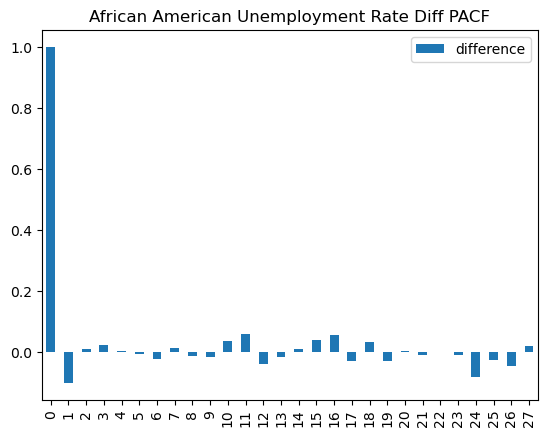

In [13]:
# PACF - unemployment rate differential

x_acf = pd.DataFrame(pacf(df.diff_1[1:]))
x_acf.plot(kind = "bar")
plt.title("African American Unemployment Rate Diff PACF")
plt.legend(["difference"])

In [24]:
# It's ARIMA modeling time!

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df.unemployment_rate, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                               SARIMAX Results                                
Dep. Variable:      unemployment_rate   No. Observations:                  615
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -606.686
Date:                Sat, 29 Apr 2023   AIC                           1215.372
Time:                        15:33:26   BIC                           1219.792
Sample:                             0   HQIC                          1217.091
                                - 615                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.4224      0.004    113.846      0.000       0.415       0.430
Ljung-Box (L1) (Q):                   6.32   Jarque-Bera (JB):            178536.64
Prob(Q):                              0.01   Pr

In [25]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df.unemployment_rate, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                               SARIMAX Results                                
Dep. Variable:      unemployment_rate   No. Observations:                  615
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -606.531
Date:                Sat, 29 Apr 2023   AIC                           1219.062
Time:                        15:33:32   BIC                           1232.327
Sample:                             0   HQIC                          1224.220
                                - 615                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0900      1.788      6.203      0.000       7.586      14.594
ar.L1          0.9809      0.010    100.012      0.000       0.962       1.000
sigma2         0.4186      0.006     64.705      0.0

In [22]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df.unemployment_rate, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                               SARIMAX Results                                
Dep. Variable:      unemployment_rate   No. Observations:                  615
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -604.042
Date:                Sat, 29 Apr 2023   AIC                           1216.085
Time:                        15:31:40   BIC                           1233.771
Sample:                             0   HQIC                          1222.962
                                - 615                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9846      2.046      5.369      0.000       6.975      14.995
ar.L1          0.9846      0.009    109.313      0.000       0.967       1.002
ma.L1         -0.0893      0.031     -2.857      0.0

In [26]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df.unemployment_rate, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                               SARIMAX Results                                
Dep. Variable:      unemployment_rate   No. Observations:                  615
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -603.518
Date:                Sat, 29 Apr 2023   AIC                           1213.037
Time:                        15:33:36   BIC                           1226.297
Sample:                             0   HQIC                          1218.193
                                - 615                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1674      0.263     -0.638      0.524      -0.682       0.347
ma.L1          0.0670      0.261      0.257      0.797      -0.445       0.579
sigma2         0.4181      0.004     98.069      0.0

In [28]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df.unemployment_rate, order=(1,1,5))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                               SARIMAX Results                                
Dep. Variable:      unemployment_rate   No. Observations:                  615
Model:                 ARIMA(1, 1, 5)   Log Likelihood                -603.273
Date:                Sat, 29 Apr 2023   AIC                           1220.545
Time:                        15:45:53   BIC                           1251.485
Sample:                             0   HQIC                          1232.577
                                - 615                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4593      2.496      0.184      0.854      -4.433       5.352
ma.L1         -0.5599      2.497     -0.224      0.823      -5.454       4.334
ma.L2          0.0688      0.253      0.272      0.7

Conclusion 

None of the models appear great given their high absolute value log likelihood. 
AICs are considered the best metric to determine which model is the best to use. 
The AICs are listed below. 

0,1,0  = 1215.372
1,0,0 = 1219.062
1,0,1 = 1216.085
*** 1,1,1 = 1213.037
1,1,5 = 1220.545

The difference between the worst model (1,1,5) and the best model (1,1,1) is 1.006
This suggests that it is likely that less information was lost between the two models. 
ARIMA 1213.037 is the best model to choose and there is a solid probability
the information lost for the other models compared to 1,1,1 is similar - given the closeness of the 
other model's AIC values. 


